In [ ]:
# dataset used - https://www.kaggle.com/datasets/govindaramsriram/crop-yield-of-a-farm

A1. Train a Regression Model

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Loading dataset
df = pd.read_csv("crop_yield_data.csv")

# Selecting one feature and the target
X = df[['rainfall_mm']]
y = df['crop_yield']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
reg = LinearRegression().fit(X_train, y_train)

# Predicting on training data
y_train_pred = reg.predict(X_train)

# Evaluating model
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

print("Slope (m):", reg.coef_[0])
print("Intercept (c):", reg.intercept_)

Slope (m): 0.031398381103053916
Intercept (c): 288.41110777210497


A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.
Perform prediction on the test data and compare the metric values between train and test set.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # in %
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Metrics for training
mse_train, rmse_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)

# Metrics for testing
mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

# Printing the results
print("TRAIN SET METRICS:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")
print(f"R²: {r2_train:.4f}\n")

print("TEST SET METRICS:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")
print(f"R²: {r2_test:.4f}")


TRAIN SET METRICS:
MSE: 20747.7145
RMSE: 144.0407
MAPE: 57.29%
R²: 0.0088

TEST SET METRICS:
MSE: 21373.7979
RMSE: 146.1978
MAPE: 58.36%
R²: 0.0019


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Using ALL attributes except the target
X = df.drop(columns=['crop_yield'])
y = df['crop_yield']

# Spliting the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
reg = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # %
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Training set metrics
mse_train, rmse_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)

# Testing set metrics
mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

# Printing results
print("TRAIN SET METRICS (All Features):")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")
print(f"R²: {r2_train:.4f}\n")

print("TEST SET METRICS (All Features):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")
print(f"R²: {r2_test:.4f}")


TRAIN SET METRICS (All Features):
MSE: 0.0858
RMSE: 0.2929
MAPE: 0.10%
R²: 1.0000

TEST SET METRICS (All Features):
MSE: 0.0818
RMSE: 0.2859
MAPE: 0.10%
R²: 1.0000


A4. Perform k-means clustering on your data.

In [15]:
from sklearn.cluster import KMeans
X = df.drop(columns=["crop_yield"])

# K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_train)

# Clustering labels for training data
labels = kmeans.labels_

# Cluster centers
centers = kmeans.cluster_centers_

# Printing results
print("Cluster Labels:", labels)
print("\nCluster Centers:\n", centers)

Cluster Labels: [0 0 0 ... 0 1 1]

Cluster Centers:
 [[1615.234412 ]
 [ 870.4439541]]


A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate metrics
def calc_metric(train,label):
  sil_score = silhouette_score(train, label)
  ch_score = calinski_harabasz_score(train, label)
  db_index = davies_bouldin_score(train, label)
  return sil_score, ch_score, db_index

sil_score, ch_score, db_index = calc_metric(X_train, kmeans.labels_)

# Printing Output
print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.6152638005080894
Calinski-Harabasz Score: 6806.749434713938
Davies-Bouldin Index: 0.5150337279841435


A6.  Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.


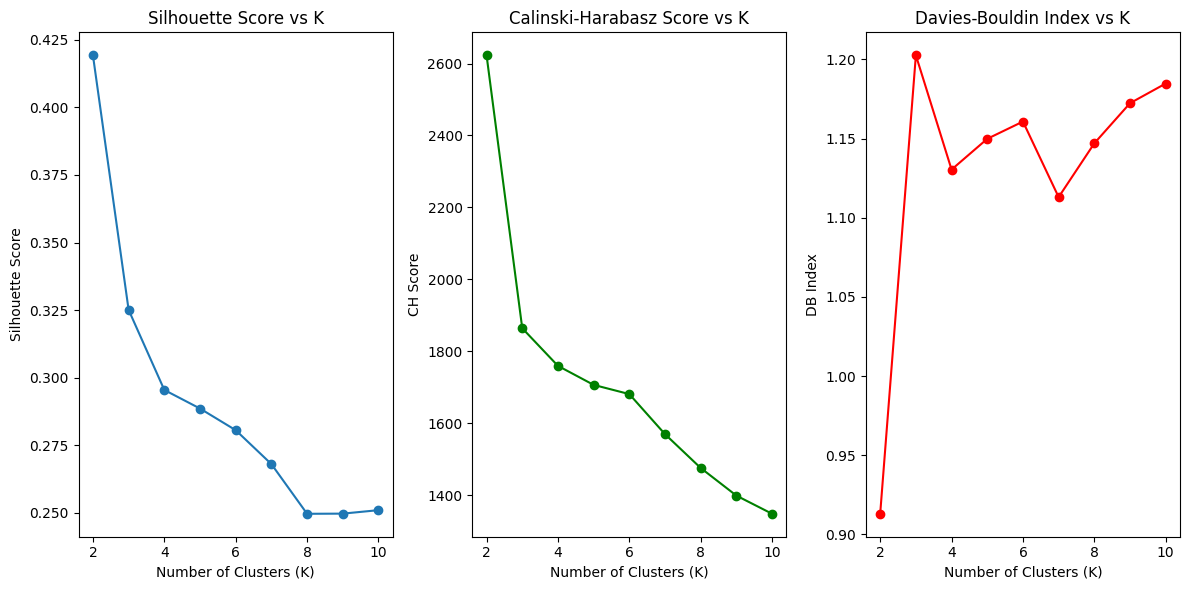

In [10]:
import matplotlib.pyplot as plt

# Lists to store results
k_values = range(2, 11)  # k from 2 to 10
sil_scores = []
ch_scores = []
db_scores = []

# Looping over different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

# Plotting the metrics
plt.figure(figsize=(12, 6))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

# Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("CH Score")

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()

A7. Using elbow plot, determine the optimal k value for k-means clustering

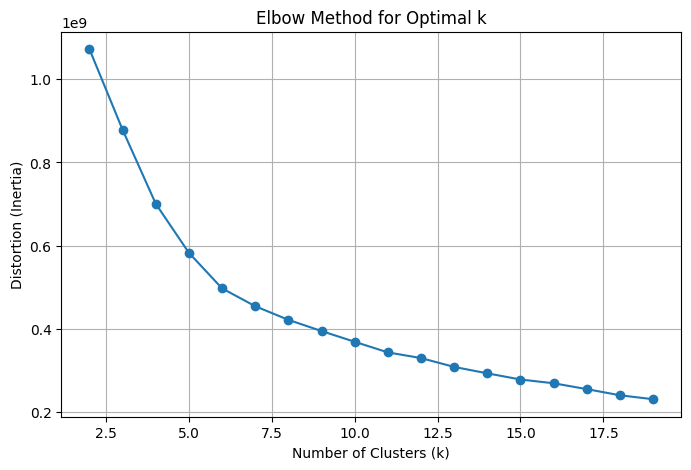

In [11]:
# Elbow plot
distortions = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)
plt.show()